In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#4): Which is digit '9'


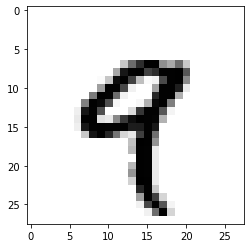

In [26]:
digit = 4 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")


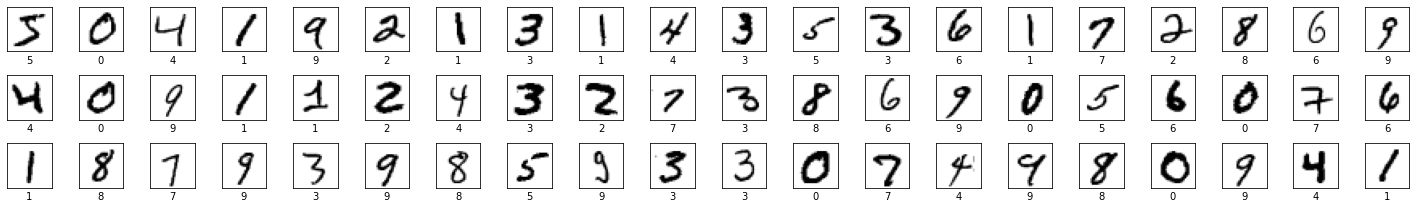

In [27]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [28]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [29]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [30]:
model_adam = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [31]:
model_adam.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [41]:
h = model_adam.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
657/657 [==============================] - 50s 75ms/step - loss: 0.1872 - accuracy: 0.9434 - val_loss: 0.0718 - val_accuracy: 0.9782
Epoch 2/10
657/657 [==============================] - 45s 68ms/step - loss: 0.0544 - accuracy: 0.9835 - val_loss: 0.0611 - val_accuracy: 0.9818
Epoch 3/10
657/657 [==============================] - 46s 71ms/step - loss: 0.0371 - accuracy: 0.9883 - val_loss: 0.0521 - val_accuracy: 0.9838
Epoch 4/10
657/657 [==============================] - 47s 71ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0461 - val_accuracy: 0.9865
Epoch 5/10
657/657 [==============================] - 47s 72ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0443 - val_accuracy: 0.9878
Epoch 6/10
657/657 [==============================] - 46s 70ms/step - loss: 0.0174 - accuracy: 0.9945 - val_loss: 0.0411 - val_accuracy: 0.9881
Epoch 7/10
657/657 [==============================] - 46s 70ms/step - loss: 0.0129 - accuracy: 0.9955 - val_loss: 0.0426 - val_accuracy:

In [14]:
model_sgd = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model_sgd.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [15]:
model_sgd.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [42]:
h_sgd = model_sgd.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
657/657 [==============================] - 44s 67ms/step - loss: 0.1224 - accuracy: 0.9627 - val_loss: 0.1441 - val_accuracy: 0.9559
Epoch 2/10
657/657 [==============================] - 50s 76ms/step - loss: 0.1069 - accuracy: 0.9680 - val_loss: 0.1101 - val_accuracy: 0.9671
Epoch 3/10
657/657 [==============================] - 44s 67ms/step - loss: 0.0945 - accuracy: 0.9721 - val_loss: 0.1201 - val_accuracy: 0.9652
Epoch 4/10
657/657 [==============================] - 45s 69ms/step - loss: 0.0857 - accuracy: 0.9744 - val_loss: 0.0967 - val_accuracy: 0.9713
Epoch 5/10
657/657 [==============================] - 45s 69ms/step - loss: 0.0786 - accuracy: 0.9764 - val_loss: 0.0882 - val_accuracy: 0.9731
Epoch 6/10
657/657 [==============================] - 46s 70ms/step - loss: 0.0722 - accuracy: 0.9780 - val_loss: 0.1639 - val_accuracy: 0.9522
Epoch 7/10
657/657 [==============================] - 47s 72ms/step - loss: 0.0680 - accuracy: 0.9792 - val_loss: 0.0808 - val_accuracy:

In [18]:
model_RMSprop = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [21]:
model_RMSprop.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


In [43]:
h = model_RMSprop.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_split=0.3)


Epoch 1/10
657/657 [==============================] - 45s 69ms/step - loss: 0.0189 - accuracy: 0.9941 - val_loss: 0.0442 - val_accuracy: 0.9887
Epoch 2/10
657/657 [==============================] - 46s 70ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0447 - val_accuracy: 0.9880
Epoch 3/10
657/657 [==============================] - 45s 68ms/step - loss: 0.0094 - accuracy: 0.9967 - val_loss: 0.0435 - val_accuracy: 0.9893
Epoch 4/10
657/657 [==============================] - 53s 81ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.0473 - val_accuracy: 0.9889
Epoch 5/10
657/657 [==============================] - 51s 77ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0529 - val_accuracy: 0.9891
Epoch 6/10
657/657 [==============================] - 46s 69ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0564 - val_accuracy: 0.9883
Epoch 7/10
657/657 [==============================] - 46s 69ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0568 - val_accuracy:

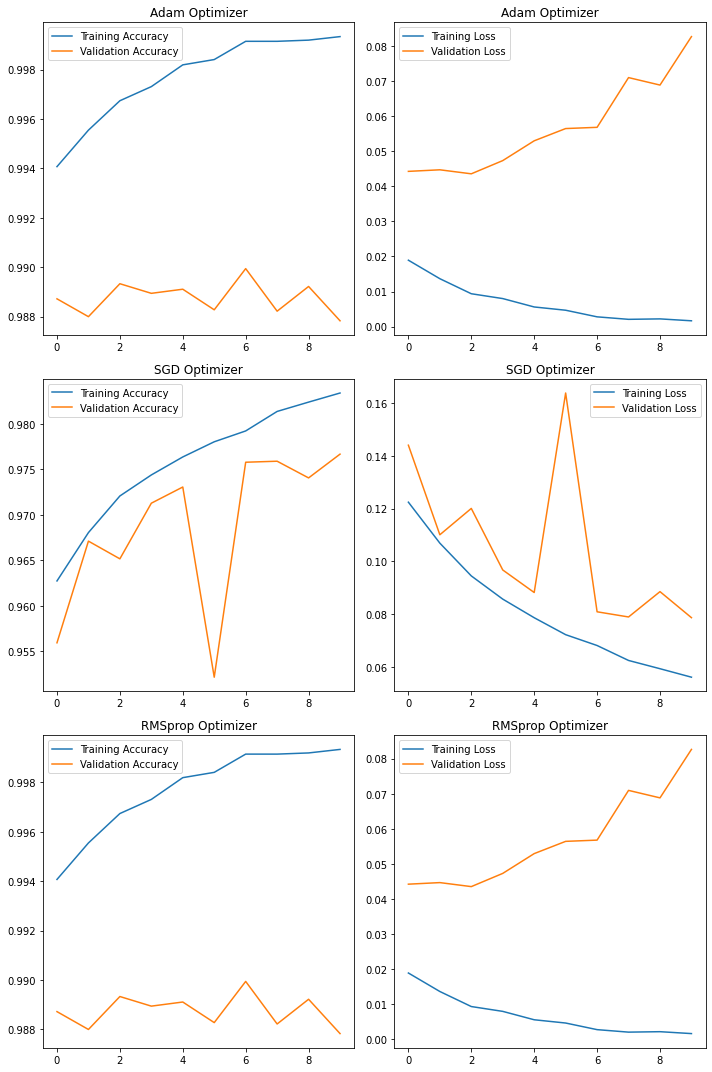

In [45]:
# Plot accuracy and loss for each optimizer
plt.figure(figsize=(10, 15))

# Adam optimizer
plt.subplot(3, 2, 1)
plt.plot(h.history['accuracy'], label='Training Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.title('Adam Optimizer')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(h.history['loss'], label='Training Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.title('Adam Optimizer')
plt.legend()

# SGD optimizer
plt.subplot(3, 2, 3)
plt.plot(h_sgd.history['accuracy'], label='Training Accuracy')
plt.plot(h_sgd.history['val_accuracy'], label='Validation Accuracy')
plt.title('SGD Optimizer')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(h_sgd.history['loss'], label='Training Loss')
plt.plot(h_sgd.history['val_loss'], label='Validation Loss')
plt.title('SGD Optimizer')
plt.legend()

# RMSprop optimizer
plt.subplot(3, 2, 5)
plt.plot(h.history['accuracy'], label='Training Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.title('RMSprop Optimizer')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(h.history['loss'], label='Training Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.title('RMSprop Optimizer')
plt.legend()

plt.tight_layout()
plt.show()
